In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [4]:
# Load the dataset
df =pd.read_csv(r"C:\Users\Peps\Documents\Downloads\heart_disease_health_indicators.csv")


# Display the first few rows of the dataset and the datatypes of columns
df.head(), df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   HeartDiseaseorAttack  253680 non-null  int64
 1   HighBP                253680 non-null  int64
 2   HighChol              253680 non-null  int64
 3   CholCheck             253680 non-null  int64
 4   BMI                   253680 non-null  int64
 5   Smoker                253680 non-null  int64
 6   Stroke                253680 non-null  int64
 7   Diabetes              253680 non-null  int64
 8   PhysActivity          253680 non-null  int64
 9   Fruits                253680 non-null  int64
 10  Veggies               253680 non-null  int64
 11  HvyAlcoholConsump     253680 non-null  int64
 12  AnyHealthcare         253680 non-null  int64
 13  NoDocbcCost           253680 non-null  int64
 14  GenHlth               253680 non-null  int64
 15  MentHlth              253680 non-n

(   HeartDiseaseorAttack  HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  \
 0                     0       1         1          1   40       1       0   
 1                     0       0         0          0   25       1       0   
 2                     0       1         1          1   28       0       0   
 3                     0       1         0          1   27       0       0   
 4                     0       1         1          1   24       0       0   
 
    Diabetes  PhysActivity  Fruits  ...  AnyHealthcare  NoDocbcCost  GenHlth  \
 0         0             0       0  ...              1            0        5   
 1         0             1       0  ...              0            1        3   
 2         0             0       1  ...              1            1        5   
 3         0             1       1  ...              1            0        2   
 4         0             1       1  ...              1            0        2   
 
    MentHlth  PhysHlth  DiffWalk  Sex  Age  Educ

In [5]:
sns.set(style="whitegrid")

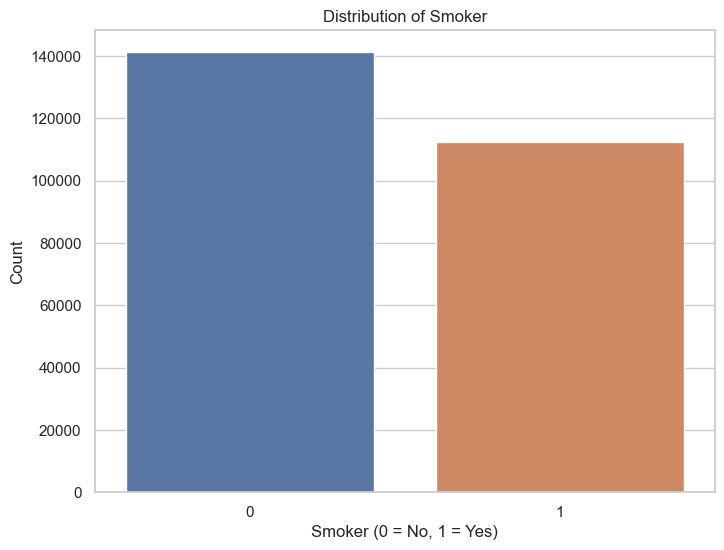

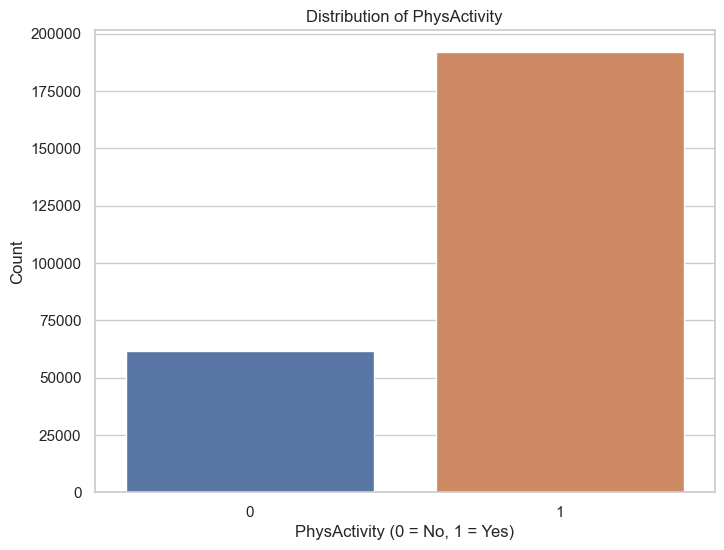

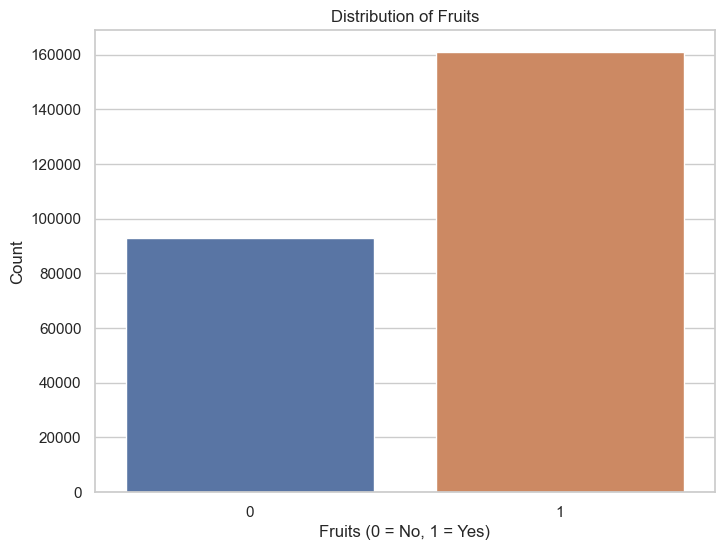

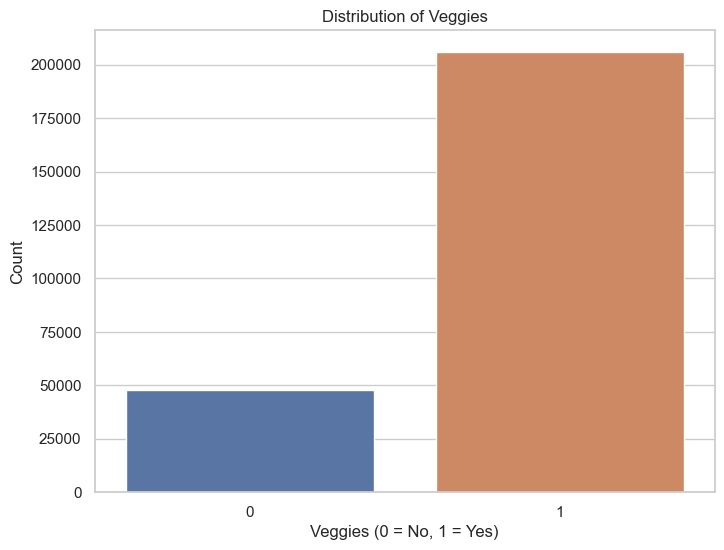

In [6]:
# List of categorical columns to visualize
categorical_columns = ['Smoker', 'PhysActivity', 'Fruits', 'Veggies']

# Plot bar charts for each categorical variable
for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=column, data=df)
    plt.title(f'Distribution of {column}')
    plt.xlabel(f'{column} (0 = No, 1 = Yes)')
    plt.ylabel('Count')
    plt.show()

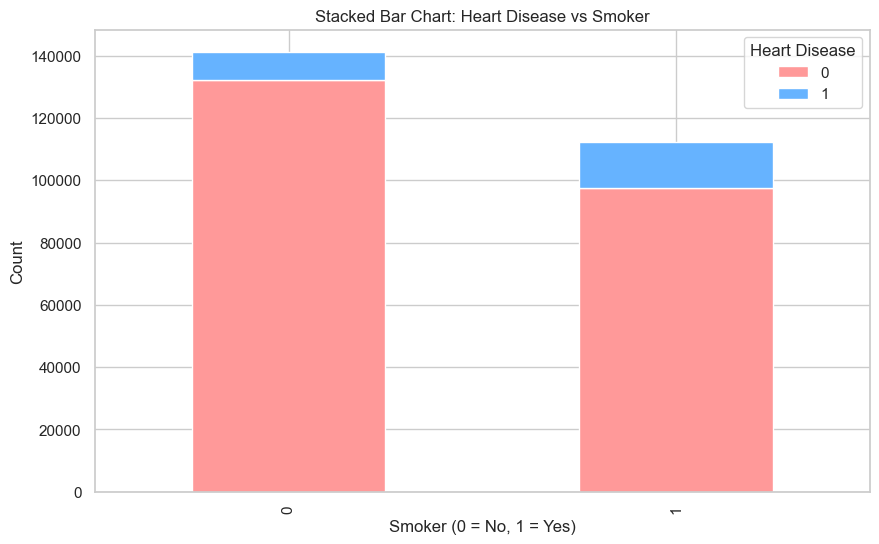

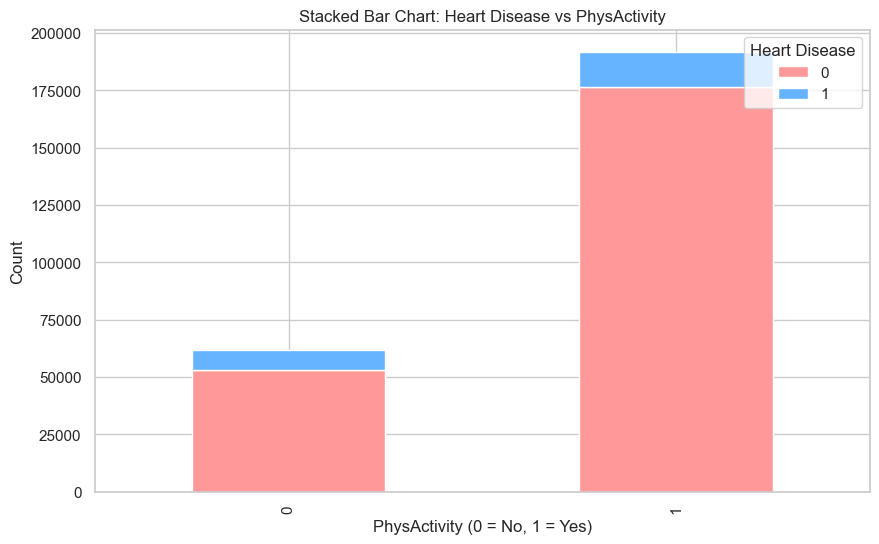

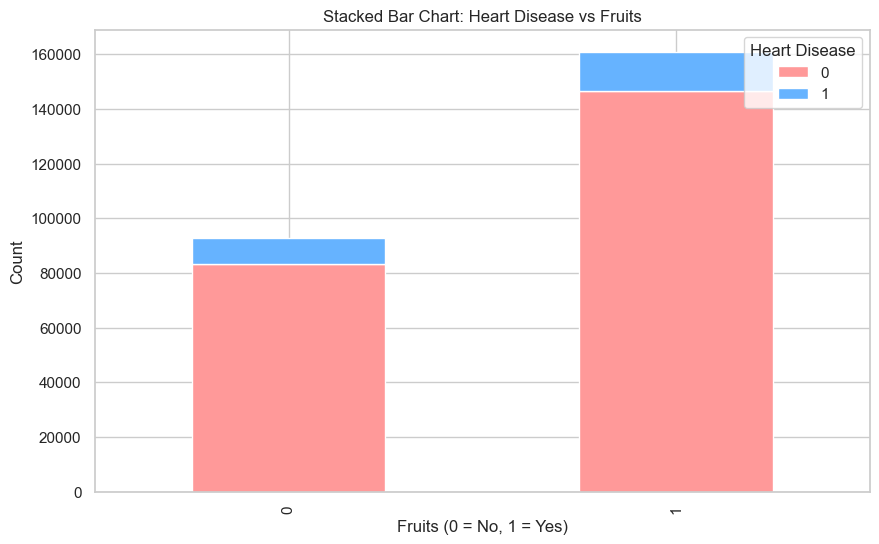

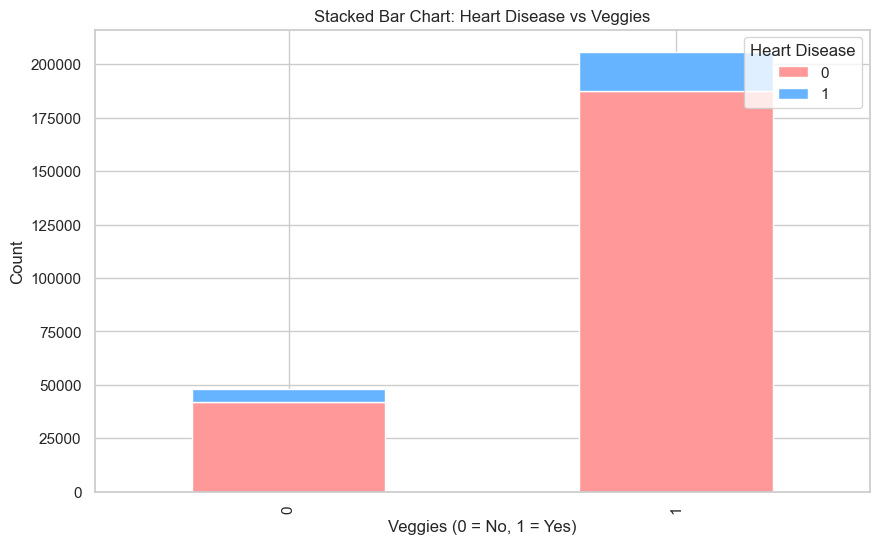

In [9]:
import numpy as np
# Function to plot a stacked bar chart
def plot_stacked_bar(column):
    # Calculate the count of each category for heart disease and no heart disease
    heart_disease_counts = df.groupby([column, 'HeartDiseaseorAttack']).size().unstack()
    
    # Plot the stacked bar chart
    heart_disease_counts.plot(kind='bar', stacked=True, color=['#ff9999','#66b3ff'], figsize=(10, 6))
    plt.title(f'Stacked Bar Chart: Heart Disease vs {column}')
    plt.xlabel(f'{column} (0 = No, 1 = Yes)')
    plt.ylabel('Count')
    plt.legend(title='Heart Disease', loc='upper right')
    plt.show()

# Plot stacked bar charts for each categorical variable
for column in categorical_columns:
    plot_stacked_bar(column)

C:\Users\Peps\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


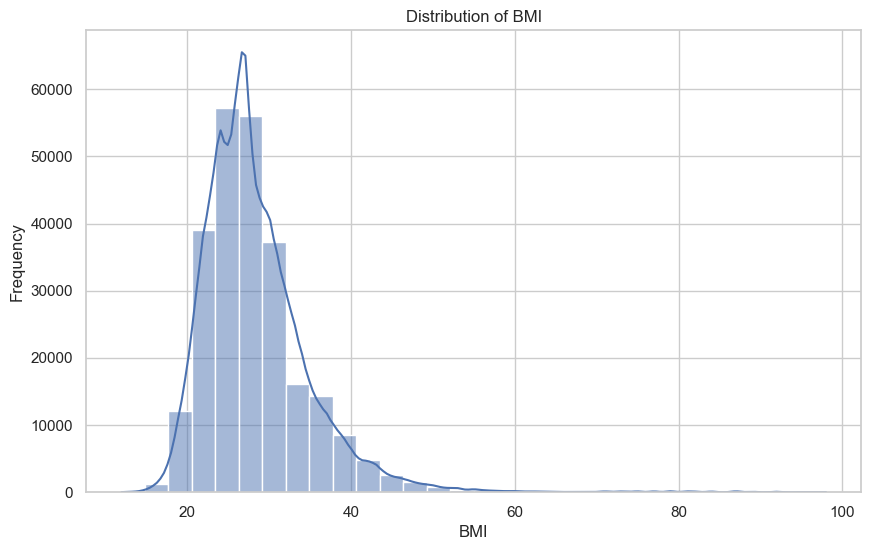

C:\Users\Peps\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


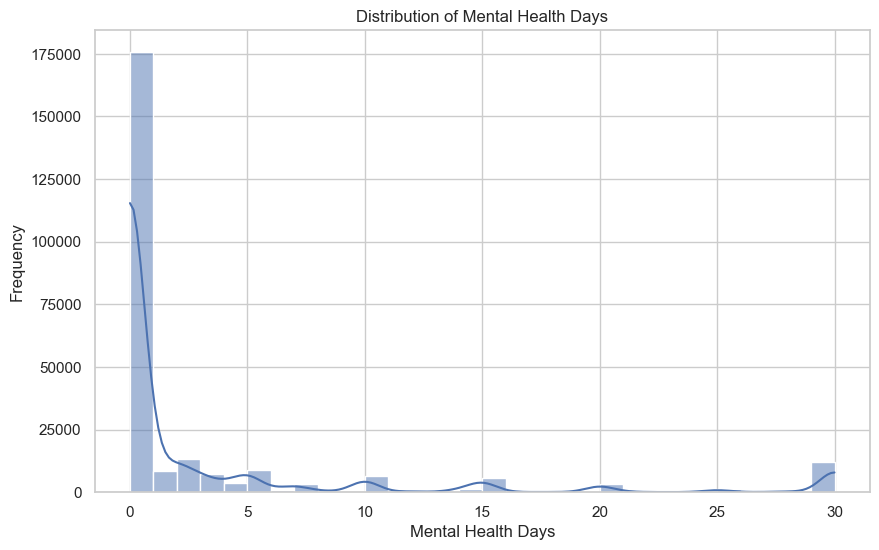

C:\Users\Peps\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


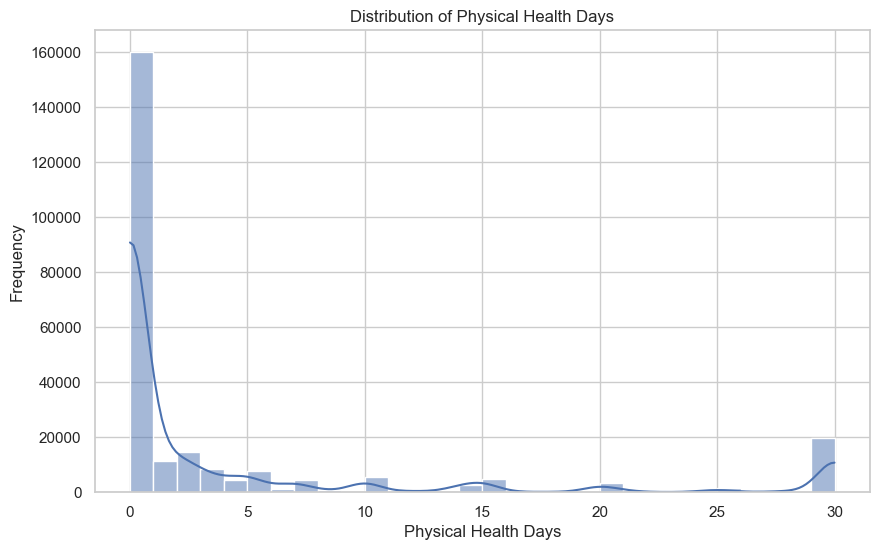

In [10]:
# a. Display Distributions of Continuous Variables:
# Histograms for continuous variables
plt.figure(figsize=(10, 6))
sns.histplot(df['BMI'], bins=30, kde=True)
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df['MentHlth'].astype(int), bins=30, kde=True)
plt.title('Distribution of Mental Health Days')
plt.xlabel('Mental Health Days')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df['PhysHlth'].astype(int), bins=30, kde=True)
plt.title('Distribution of Physical Health Days')
plt.xlabel('Physical Health Days')
plt.ylabel('Frequency')
plt.show()


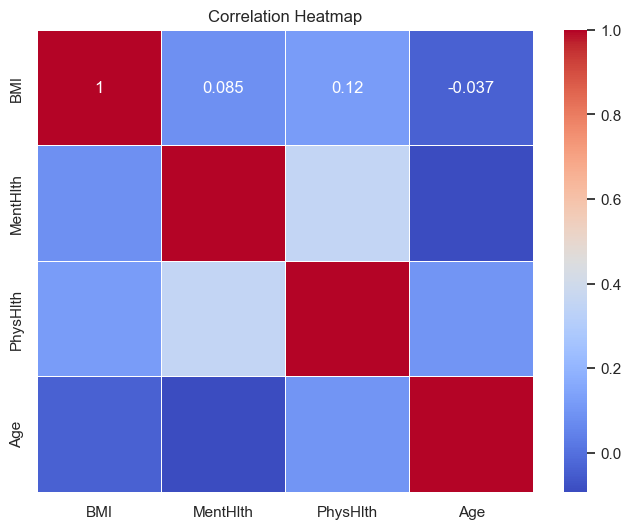

In [11]:
#b. Heatmaps and Correlation Plots: Explore Variable Relationships
# Correlation matrix for continuous variables
corr_matrix = df[['BMI', 'MentHlth', 'PhysHlth', 'Age']].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

C:\Users\Peps\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


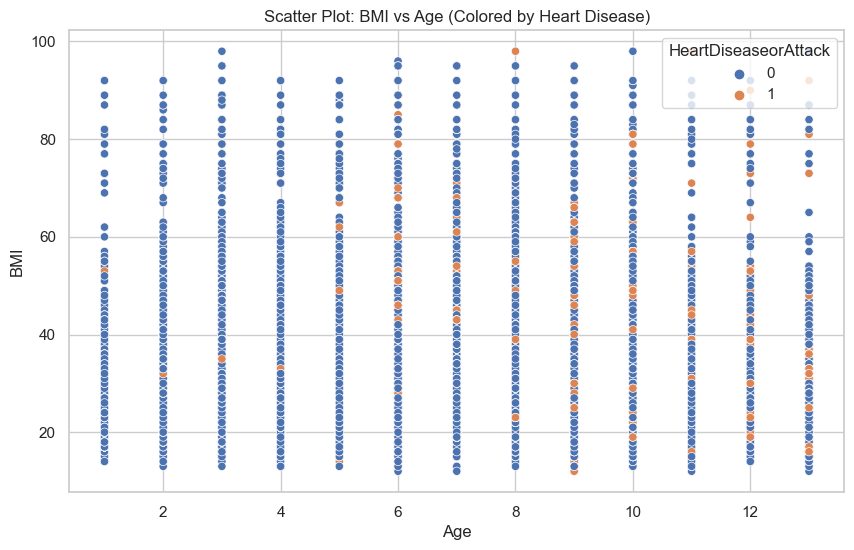

In [12]:
#c.Scatter Plots: Investigate Relationships Between Variables
# Scatter plot between BMI and Age
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='BMI', hue='HeartDiseaseorAttack', data=df)
plt.title('Scatter Plot: BMI vs Age (Colored by Heart Disease)')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.show()

C:\Users\Peps\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


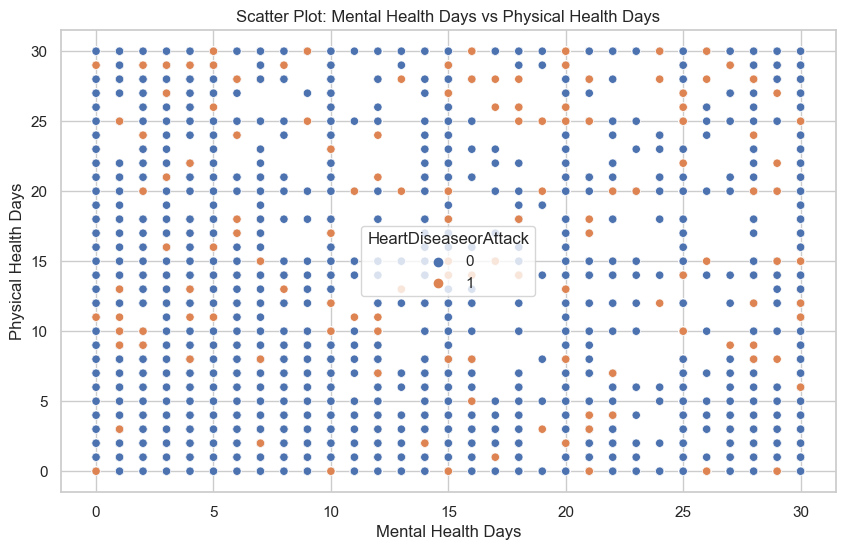

In [13]:
# Scatter plot between MentHlth and PhysHlth
plt.figure(figsize=(10, 6))
sns.scatterplot(x='MentHlth', y='PhysHlth', hue='HeartDiseaseorAttack', data=df)
plt.title('Scatter Plot: Mental Health Days vs Physical Health Days')
plt.xlabel('Mental Health Days')
plt.ylabel('Physical Health Days')
plt.show()

C:\Users\Peps\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Peps\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


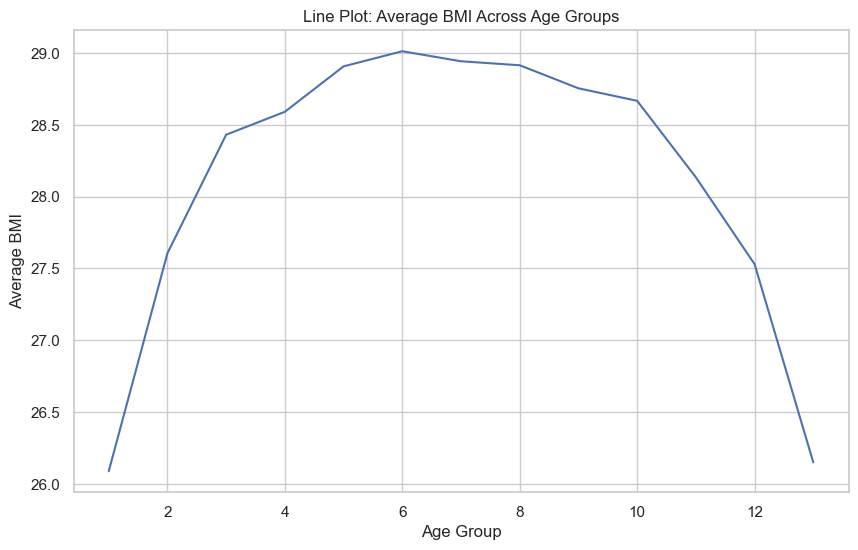

In [14]:
#d. Line Plots: Display Trends Over Time or Across Ordered Categories
    # Line plot showing average BMI across age groups
age_bmi_mean = df.groupby('Age')['BMI'].mean()

plt.figure(figsize=(10, 6))
sns.lineplot(x=age_bmi_mean.index, y=age_bmi_mean.values)
plt.title('Line Plot: Average BMI Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Average BMI')
plt.show()

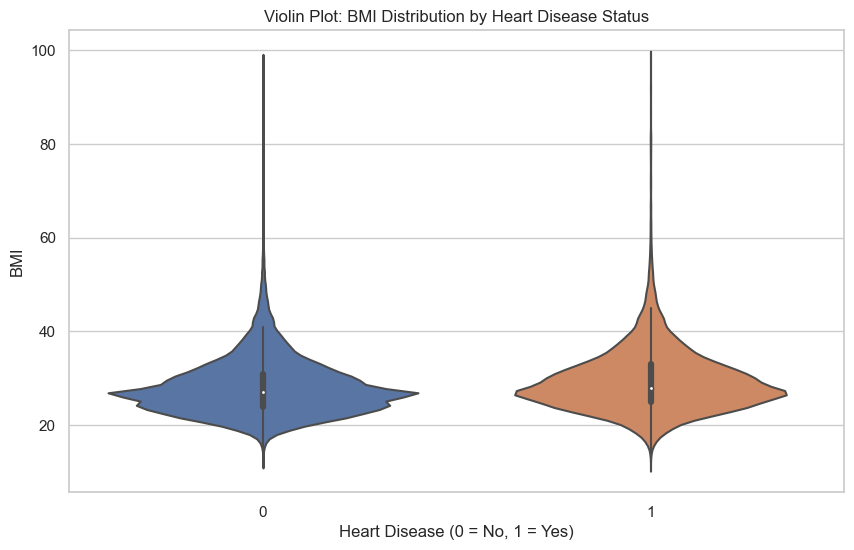

In [15]:
#e. Violin Plots: Combine Aspects of Box Plots and Density Plots
# Violin plot for BMI based on heart disease status
plt.figure(figsize=(10, 6))
sns.violinplot(x='HeartDiseaseorAttack', y='BMI', data=df)
plt.title('Violin Plot: BMI Distribution by Heart Disease Status')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('BMI')
plt.show()

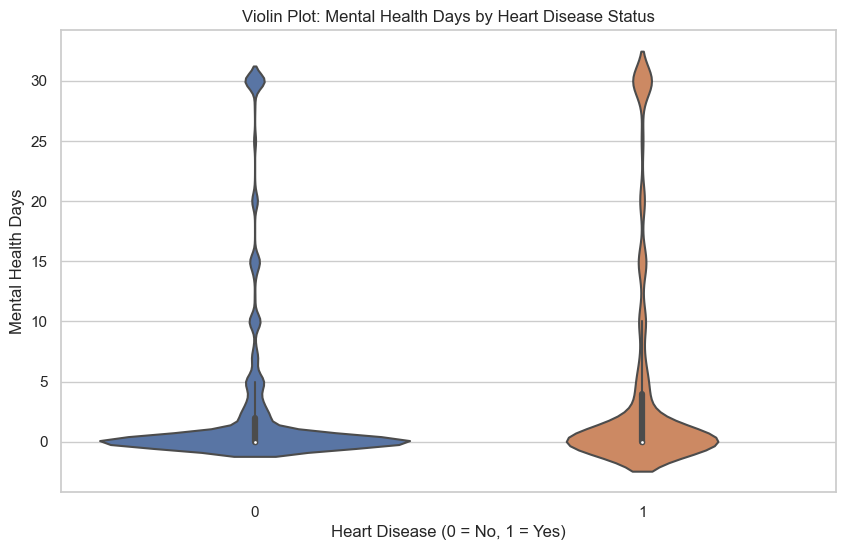

In [16]:
# Violin plot for Mental Health Days
plt.figure(figsize=(10, 6))
sns.violinplot(x='HeartDiseaseorAttack', y='MentHlth', data=df)
plt.title('Violin Plot: Mental Health Days by Heart Disease Status')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Mental Health Days')
plt.show()

C:\Users\Peps\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Peps\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Peps\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Peps\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

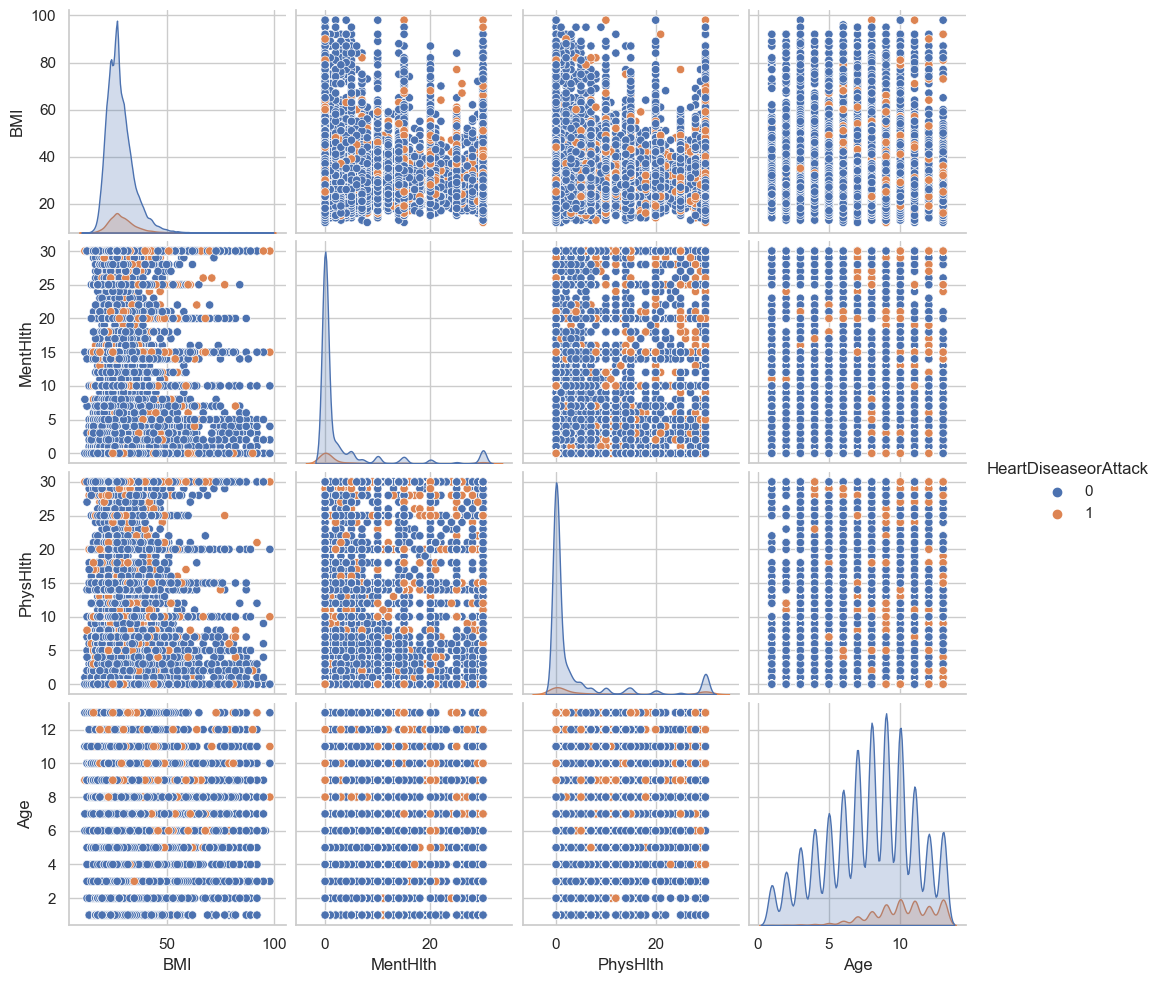

In [17]:
#f. Pair Plots: Plot Pairwise Relationships Across Multiple Variables
# Pair plot for continuous variables, colored by heart disease status
sns.pairplot(df[['BMI', 'MentHlth', 'PhysHlth', 'Age', 'HeartDiseaseorAttack']], hue='HeartDiseaseorAttack')
plt.show()
